<a href="https://colab.research.google.com/github/YRYoung/HPC/blob/main/Assigenment/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

* Write a Python function that takes *N* as an input and returns the matrix *A* and vector *f*.
* You should use an appropriate sparse storage format for the matrix *A*.

In [90]:
import numpy as np
from scipy.sparse import csr_matrix


def generate_mat(N):
    assert N >= 0
    if N == 0: return np.array([1]), np.array([1])

    f = np.concatenate([np.zeros(N), [1]], axis=0)

    A = np.zeros([N + 1, N + 1])
    for i in range(1, N):
        A[i, i - 1:i + 2] = [-1, 2. - (29 * 29 * np.pi * np.pi / 4 / N / N), -1]
    A[0, 0] = 1
    A[N, N] = 1

    f = csr_matrix(f)
    A = csr_matrix(A)
    # A = csc_matrix(A)

    return A, f


A, f = generate_mat(8)
print(A, '\n\n', f)

[[  1.           0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [ -1.         -30.42319258  -1.           0.           0.
    0.           0.           0.           0.        ]
 [  0.          -1.         -30.42319258  -1.           0.
    0.           0.           0.           0.        ]
 [  0.           0.          -1.         -30.42319258  -1.
    0.           0.           0.           0.        ]
 [  0.           0.           0.          -1.         -30.42319258
   -1.           0.           0.           0.        ]
 [  0.           0.           0.           0.          -1.
  -30.42319258  -1.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   -1.         -30.42319258  -1.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          -1.         -30.42319258  -1.        ]
 [  0.           0.           0.           0.           0.
    0.           0.  

* compute the approximate solution for your problem for *N=10*, *N=100*, and *N=10*.
* Plot the solutions for these three values of *N*.



[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


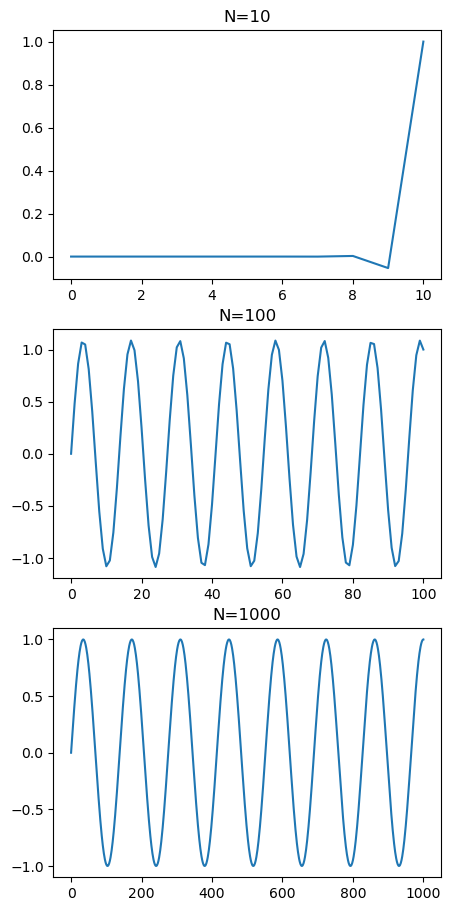

In [4]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

i = 0
fig, ax = plt.subplots(3, 1, figsize=(5, 11))
print(ax)

for N in [10, 100, 1000]:
    A, f = generate_mat(N)
    u = spsolve(A, f.T)

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x, u)
    ax[i].set_title('N=' + str(N))
    i = i + 1

plt.show()

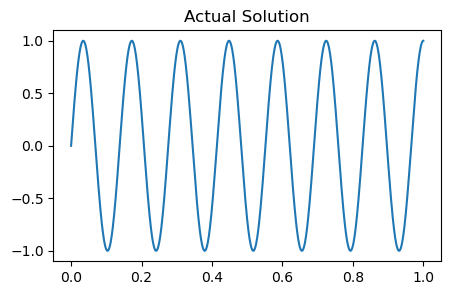

In [92]:
k = 29. * np.pi / 2.
x = np.linspace(0, 1, 1000)

u = np.sin(k * x)
plt.figure(figsize=(5, 3))
plt.plot(x, u)
plt.title('Actual Solution')
plt.show()

* Briefly (1-2 sentences) comment on your plots:

  + __How different__ are they to each other? 

  + Which do you expect to be **closest** to the actual solution of the wave problem?





Closest: N=1000

* Compute this error for a range of values for  of your choice, on axes that use log scales
* plot *N* against the error in your solution.

100%|██████████| 40/40 [00:04<00:00,  9.68it/s]


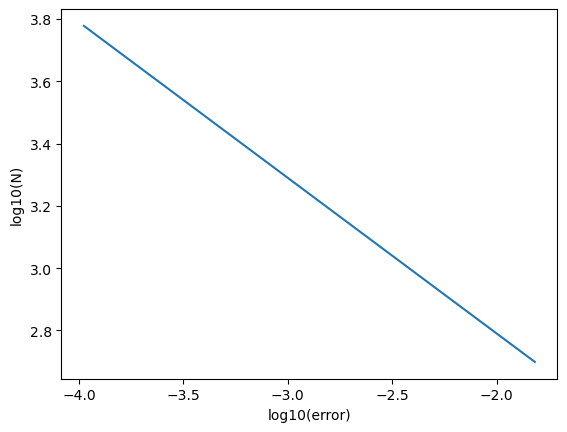

[ 500.  641.  782.  923. 1064. 1205. 1346. 1487. 1628. 1769. 1910. 2051.
 2192. 2333. 2474. 2615. 2756. 2897. 3038. 3179. 3321. 3462. 3603. 3744.
 3885. 4026. 4167. 4308. 4449. 4590. 4731. 4872. 5013. 5154. 5295. 5436.
 5577. 5718. 5859. 6000.] 
 [0.015230800983150532, 0.00926208812486675, 0.006220711463573377, 0.004465445725117041, 0.0033605796681698656, 0.002620061812831847, 0.0020997379737517103, 0.0017202634738233118, 0.0014352482033692937, 0.0012155982400537113, 0.001042737886079101, 0.0009042700855070585, 0.0007916483301855376, 0.000698871643965978, 0.0006214864213944203, 0.000556269336676813, 0.0005007982877828152, 0.0004532303440080328, 0.0004121424578045797, 0.00037639486725252885, 0.0003448938000723441, 0.0003173689935081943, 0.00029301318618465966, 0.00027136167030054545, 0.0002520225169884843, 0.00023467804419517388, 0.00021906326852074928, 0.00020495797221134135, 0.00019217379231679585, 0.0001805485833877192, 0.00016994651047461812, 0.0001602510382327331, 0.000151363401087

In [28]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 29. * np.pi / 2.
error = []
sizes = np.round(np.linspace(500, 6000, 40))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))
    u = spsolve(A, f.T)
    u_exact = np.sin(k * x)  #!!
    error.append(np.max(np.abs(u - u_exact)))

plt.plot(np.log10(error), np.log10(sizes))
plt.xlabel('log10(error)')
plt.ylabel('log10(N)')
ax = plt.gca()
plt.show()

print(sizes, '\n', error)

* For the same values of *N*, measure the time taken to compute your approximations for both functions.
* On axes that both use log scales, plot *N* against the time taken to compute a solution.

100%|██████████| 40/40 [00:08<00:00,  4.98it/s]


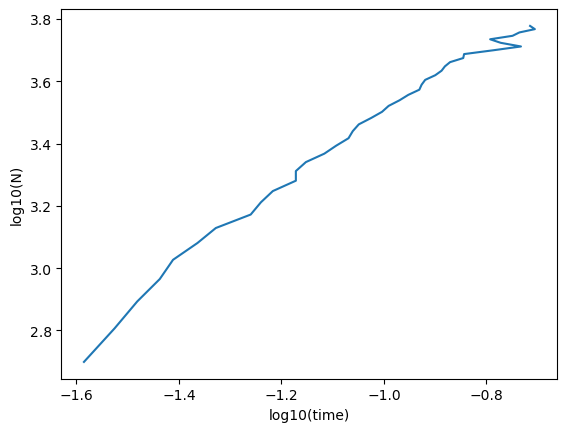

In [27]:

import matplotlib.pyplot as plt
from tqdm import tqdm
import timeit

k = 29. * np.pi / 2.
times = []
sizes = np.round(np.linspace(500, 6000, 40))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))

    t = timeit.Timer(lambda: spsolve(A, f.T)).timeit(110)

    times.append(t)

plt.plot(np.log10(times), np.log10(sizes))

plt.xlabel('log10(time)')
plt.ylabel('log10(N)')
plt.show()

* pick a value of that you would expect to give error of or 10<sup>-8</sup> less.
* Briefly (1-2 sentences) explain how you picked your value of *N*
* predict how long the computation will take

In [81]:
from sympy import symbols, solve
import math

log_time = np.log10(times)
log_error = np.log10(error)
log_size = np.log10(sizes)

f1 = np.polyfit(log_error, log_size, 1)
print('Fit function of log_error & log_size:', np.poly1d(f1))

x = symbols('x')
a = solve(f1[0] * x + f1[1] < -8)
print('\nInequation:\n', a)
result_logN = a.args[0].args[0]
result_N = math.ceil(math.pow(10., result_logN))
print('\nExpected minimum value of N that satisfies the given condition:\n', result_N)

f2 = np.polyfit(log_size, log_time, 1)
print('\nFit function of log_size & log_time:', np.poly1d(f2))

x_time = math.pow(10., f2[0] * result_logN + f2[1])
print('\nExpected computation time:\n{:.0f}'.format(x_time))

fit function of log_error & log_size:  
-0.5 x + 1.79

Inequation:
 (19.5823387933507 < x) & (x < oo)

Expected minimum value of N that satisfies the given condition:
 38224234201155559424

fit function of log_size & log_time:  
0.8427 x - 3.938

Expected computation time:
3667295443486


# Part2

* Implement this iterative scheme in Python.
    * You should implement this as a function that takes as an input.

In [138]:
import numpy as np
from scipy.sparse import coo_matrix


def generate_tem_mat(N):
    row_ind = []
    col_ind = []
    data = []

    f = np.zeros((N + 1) ** 2, dtype=np.float64)

    for j in range(N + 1):
        for i in range(N + 1):
            location = j * (N + 1) + i

            if i == 0 or i == N or j == 0:
                row_ind.append(location)
                col_ind.append(location)
                data.append(1)
                f[location] = 10 if i == 0 or i == N else 0
            else:
                row_ind += [location] * 3
                col_ind += [location - 1, location, location + 1]
                data += [-1, 2, -1]
                f[location] = 0

    # print(row_ind, '\n')
    # print(col_ind, '\n')
    # print(data, '\n')
    return coo_matrix((data, (row_ind, col_ind)), shape=((N + 1) ** 2, (N + 1) ** 2)).tocsr(), f

In [139]:
A, f = generate_tem_mat(2)
print(A.toarray(), A.shape)
print(f)

[[ 1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0  0  0  0  1]] (9, 9)
[10.  0. 10. 10.  0. 10. 10.  0. 10.]


[<AxesSubplot:> <AxesSubplot:>]


RuntimeError: SUPERLU_MALLOC fails for buf in intCalloc() at line 159 in file C:\b\abs_dbe2cddw3t\croots\recipe\scipy_1664914829870\work\scipy\sparse\linalg\_dsolve\SuperLU\SRC\memory.c


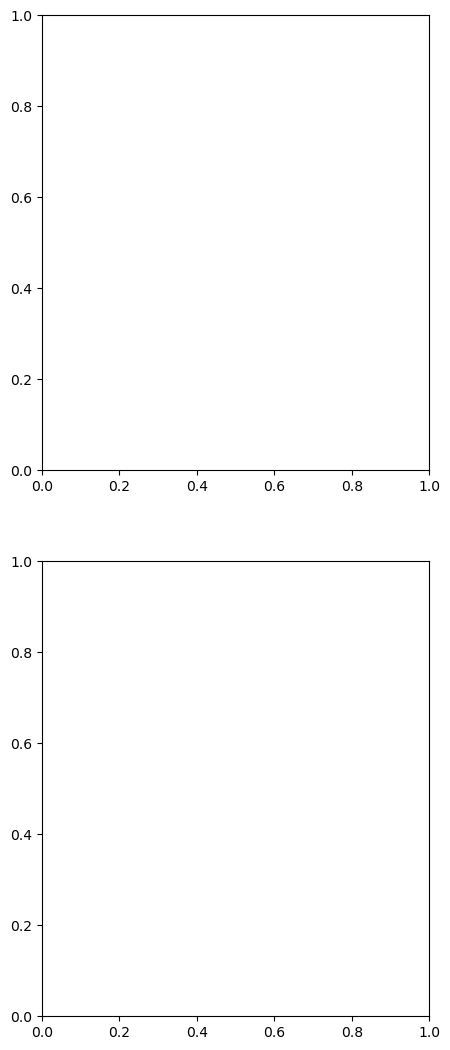

In [155]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(5, 13))
print(ax)
t = 399
for i, N in enumerate([ 4000, 5000]):
    A, f = generate_tem_mat(N)
    u = spsolve(A, f)
    print(u.shape)

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x, u[N * (t - 1):t * N + 1])
    # ax[i].plot(x, u[t - 1:len(u):N + 1])
    ax[i].set_title('N=' + str(N))

plt.show()

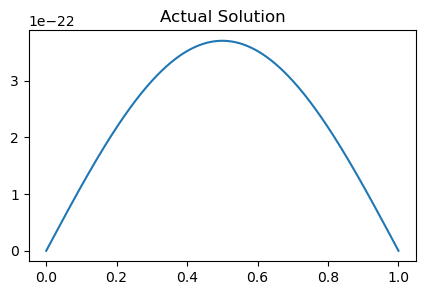

In [147]:
x = np.linspace(0, 1, 1000)
t = 5
u = np.exp(-t * ((1 * np.pi) ** 2)) * np.sin(1 * np.pi * x) - np.exp(-t * ((2 * np.pi) ** 2)) * np.sin(
    2 * np.pi * x) + np.exp(-t * ((3 * np.pi) ** 2)) * np.sin(3 * np.pi * x)
plt.figure(figsize=(5, 3))
plt.plot(x, u)
plt.title('Actual Solution')
plt.show()